<a href="https://colab.research.google.com/github/Kengmo75/Python-Regression/blob/main/Jennifer_Kengmo_Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you will perform a simple linear regression using Airbnb listings from Austin, TX, USA.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols

In [ ]:
listings = pd.read_csv("http://data.insideairbnb.com/united-states/tx/austin/2023-09-10/visualisations/listings.csv")
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,126,2,657,2023-08-27,3.72,1,306,42,NaN
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,45,1,290,2023-08-04,1.77,1,0,21,NaN
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,57,30,122,2022-10-17,0.73,1,0,3,NaN
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,159,3,305,2023-09-04,2.09,1,156,17,NaN
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,48,4,51,2023-05-16,0.31,1,98,3,NaN


## Prepare the data

First, we need to prepare the data to fit the model.

1.   Determine the predictor and outcome variables.
2.   Assess the variables and clean the data as necessary.

## Determine the predictor and outcome variables

**Predictor/independent variable**

We can use the nightly price as our predictor variable.

Caveat:
- The nightly price could have changed at various points in the past year.

**Outcome/dependent variable**

We can estimate the number of nights booked in the last year by multiplying the number of reviews in the past year by the minimum number of nights per stay.

Caveats:
- A stay can be longer than the minimum number of nights.
- This doesn't account for any times that the host blocked as non-bookable.

In [ ]:
# Changing the 'last_review' to datetime format
listings['last_review'] = pd.to_datetime(listings['last_review'])

# Calculating the number of reviews in the last year
reviews_last_year = listings[listings['last_review'] >= listings['last_review'].max() - pd.DateOffset(years=1)]

# Estimating the number of nights booked in the last year
reviews_last_year['estimated_nights_booked'] = reviews_last_year['minimum_nights'] * reviews_last_year['number_of_reviews']

print(reviews_last_year[['number_of_reviews', 'minimum_nights', 'estimated_nights_booked']].head())


   number_of_reviews  minimum_nights  estimated_nights_booked
0                657               2                     1314
1                290               1                      290
2                122              30                     3660
3                305               3                      915
4                 51               4                      204


<ipython-input-49-20ad76c78b88>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_last_year['estimated_nights_booked'] = reviews_last_year['minimum_nights'] * reviews_last_year['number_of_reviews']


## Assess the variables and clean the data as necessary

Let's take a closer look at estimated nights booked in the last 12 months.

In [ ]:
##changing my date to datetime format
listings['date_of_last_review'] = pd.to_datetime(listings['last_review'])

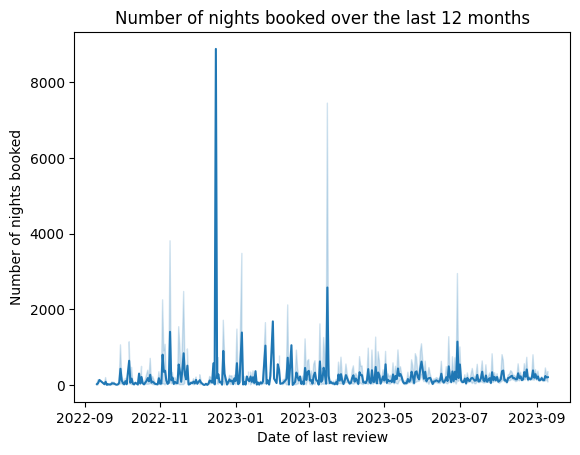

In [ ]:
#Plotting a line graph of the number of nights booked over the last 12 months
sns.lineplot(x='date_of_last_review', y='estimated_nights_booked', data=reviews_last_year)
plt.xlabel('Date of last review')
plt.ylabel('Number of nights booked')
plt.title('Number of nights booked over the last 12 months')
plt.show()

Let's take a closer look at nightly price.

In [ ]:
##Start by getting a summary statistic of the price column
print(listings['price'].describe())

count    14861.000000
mean       269.298769
std        549.376464
min          1.000000
25%         95.000000
50%        150.000000
75%        266.000000
max      19286.000000
Name: price, dtype: float64


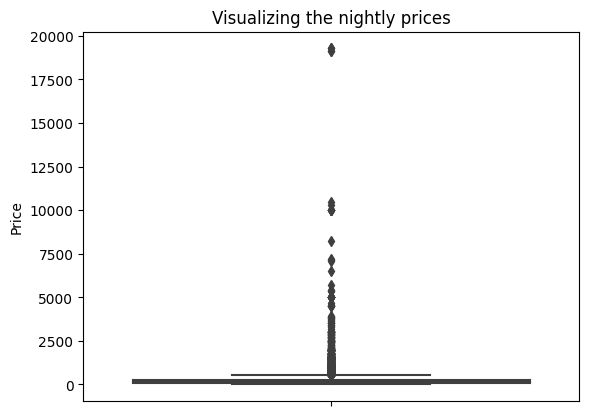

In [ ]:
#Due to the gap between the count and max we will visualize price in a histogram to check for outliers
sns.boxplot(y = listings['price'], data = listings)
plt.title('Visualizing the nightly prices')
plt.ylabel('Price')
plt.show()

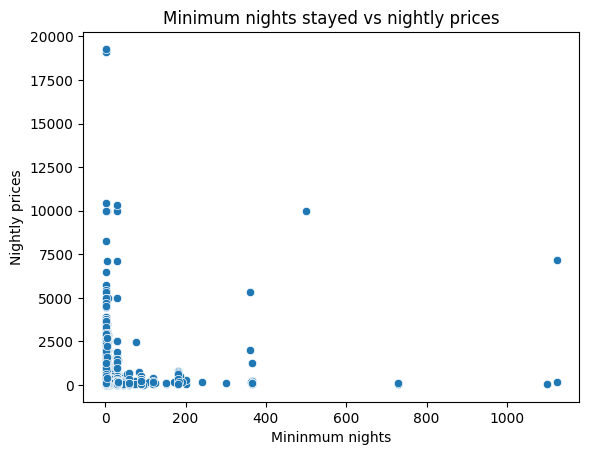

In [ ]:
#Create a visualization to understand the relationship between the nightly prices and the minimum nights
sns.scatterplot(x='minimum_nights', y='price', data = listings)
plt.xlabel('Mininmum nights')
plt.ylabel('Nightly prices')
plt.title('Minimum nights stayed vs nightly prices')
plt.show()

## Fitting the model

In [ ]:
#Inorder to fit the data in a linear regression model, we will be using the last_12_months dataset because we want our result specific to the 12 months dataframe
#Start by defining dependent and independent variables
X = reviews_last_year['price']
Y = reviews_last_year['estimated_nights_booked']
#adding a constant term to the independent variable
X = sm.add_constant(X)
#Fit the linear regression model
model = sm.OLS(Y, X).fit()
print(model.params)

const    187.275360
price     -0.032238
dtype: float64


## Assessing Model Fit

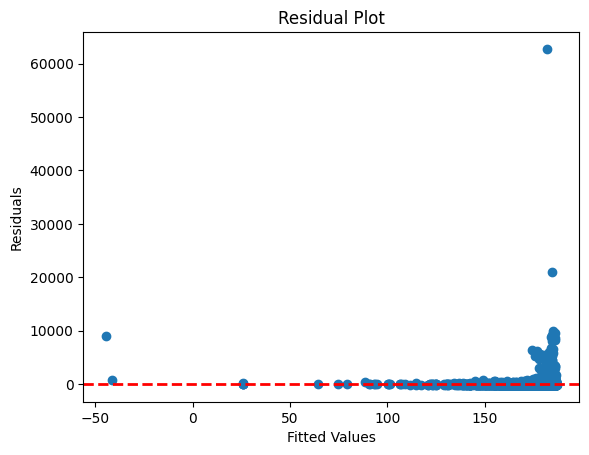

In [ ]:
#Inorder to assess the model fit, I will start by plotting Residuals
residuals = model.resid
plt.scatter(model.fittedvalues, residuals)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.show()

The Residual plot violates several key assumptions in the above model.
Firstly, the points are not random around the y=0 line.
Also, there are some outliers which indicates data points with high leverage
Looking at the model, I can see an almost linear pattern which indicates a non-linear relationship that the linear model cannot capture

In [ ]:
# Understanding the R squared value
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     estimated_nights_booked   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     1.203
Date:                     Sat, 30 Dec 2023   Prob (F-statistic):              0.273
Time:                             12:13:01   Log-Likelihood:                -74340.
No. Observations:                     9113   AIC:                         1.487e+05
Df Residuals:                         9111   BIC:                         1.487e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

An R-squared value of 0.000 indicates that the relationship between the dependent variable and independent variable is not linear, thus the linear regression model is unable to capture underlying patterns.

Also, due to the large volume of outliers in the price, we can say that this affects the performance of the model

# Hypothesis Test

In [ ]:
# Defining the target variable (y) and features (X)
y = reviews_last_year['estimated_nights_booked']
X = reviews_last_year[['number_of_reviews', 'minimum_nights']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

In [ ]:
# Individual Coefficients (t-test)
# Null hypothesis: The coefficient of a variable is equal to zero
# Alternative hypothesis: The coefficient is not equal to zero

# Perform t-tests
t_test_results = model.t_test([0, 1, 0])  # Test for the first variable, change indices accordingly

# Display t-test results
print("T-Test Results:")
print(t_test_results)

T-Test Results:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             2.2034      0.067     32.927      0.000       2.072       2.335


The above t-test suggests that the coefficient c0 is statistically significant and a p-value of 0.000 provides enough evidence to reject the null hypothesis; 'The c0 of a variable  is equal to 0' in favour of the alternative hypothesis; 'The c0 is not equal to 0.
Also, we see that the 95% confidence interval lies between the range of [2.072, 2.335]. This is a positive interval.
This results indicates that the associated variable is likely to have a significant impact on the dependent variable

In [ ]:
# Overall Model (F-test)
# Null hypothesis: All coefficients are equal to zero (no effect)
# Alternative hypothesis: At least one coefficient is not equal to zero

# Perform F-test
f_test_results = model.f_test("number_of_reviews = minimum_nights = 0")

# Display F-test results
print("\nF-Test Results:")
print(f_test_results)


F-Test Results:
<F test: F=4330.960953336058, p=0.0, df_denom=9.11e+03, df_num=2>


The f-test suggests that the model is statistically significant and with a p-value of 0.0, strong evidence is provided to reject the null hypothesis which states that the 'All coefficients are equal to zero' in favour of the alternative hypothesis that 'At least one coefficient is not equal to zero'

# Can we quantify how much nights booked would go down on average for every $1 increase in price?

In [ ]:
# We need our sumamry statistics to understand the variation of price and estimated_nights_booked
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     estimated_nights_booked   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     1.203
Date:                     Sat, 30 Dec 2023   Prob (F-statistic):              0.273
Time:                             13:13:31   Log-Likelihood:                -74340.
No. Observations:                     9113   AIC:                         1.487e+05
Df Residuals:                         9111   BIC:                         1.487e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

A negative coefficient of price indicates a negative relationship between the price and the estimated_nights_booked.

The magnitude of price represents the change in the estimated number of nights booked for a one-unit increase in price.

From the results above, the coefficient of price is -0.03 which indicates that for every $1 increase in price, the estimated bookings will fall by 0.03.
